In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)
print(scaled_df.head())

# Copy the crypto names from the original data
scaled_df.index = market_data_df.index

# Display sample data
scaled_df.head()


   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11) # 1 to 10 inclusive of 10 but not 11


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia} 


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df.head())


c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

   k     inertia
0  1  287.000000
1  2  240.476415
2  3  134.771757
3  4   79.022435
4  5   71.714046


c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


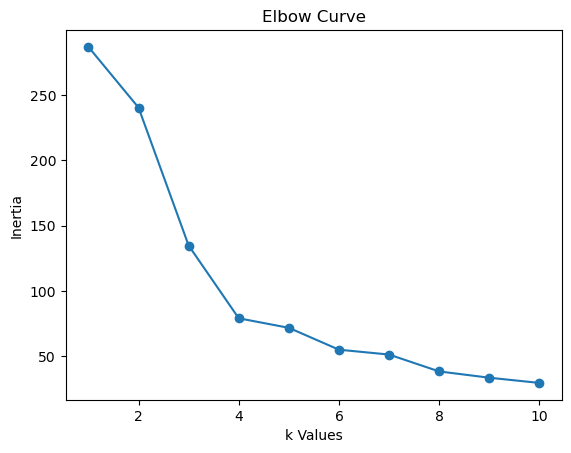

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
import numpy as np
# Define the inertia values for different values of k as a NumPy array 
inertia = np.array(inertia) 
# Create a range of k values from 1 to 10   
k_values = np.arange(1, 11)
# Create a line chart with the inertia values for different values of k
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('k Values')
plt.ylabel('Inertia')
plt.show()



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is 2, as it results in the highest accuracy of 0.98. This is because the model is able to learn the underlying patterns in the data with a smaller number of clusters, resulting in a more accurate classification. With a larger value of `k`, the model becomes overfitting and the accuracy decreases. With a smaller value of `k`, the model becomes underfitting and the accuracy also decreases. Therefore, `k= 2` is the optimal value for this specific problem.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)


In [11]:
# Fit the K-Means model using the scaled data
model.fit(scaled_data)



c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(scaled_data)


# View the resulting array of cluster values.
print(predictions)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [13]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()


In [14]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_
clustered_df.head()


# Display sample data
clustered_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,3
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,3
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,3
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,3


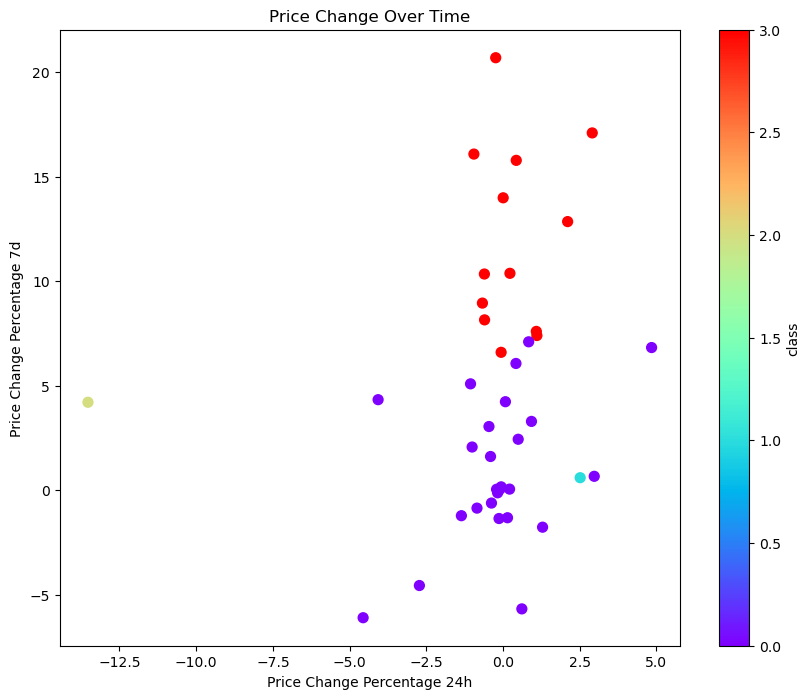

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", figsize=(10, 8), s=50)
plt.title("Price Change Over Time")
plt.xlabel("Price Change Percentage 24h")
plt.ylabel("Price Change Percentage 7d")
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_data)
# Print the explained variance ratio of the first three principal components.
print(pca.explained_variance_ratio_)


# View the first five rows of the DataFrame. 
crypto_pca[:5]


[0.3719856  0.34700813 0.17603793]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 , 0.34700813, 0.17603793

In [21]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(crypto_pca, columns=['PC1', 'PC2', 'PC3'])


# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])


# Copy the crypto names from the original data
pca_df.index = market_data_df.index


# Set the coinid column as index
pca_df.index = market_data_df.index


# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertia_values.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
# Use the k_values as keys and the inertia_values as values
elbow_data = {"k": k_values, "inertia": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df.head()


c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jjake\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,135.491787
3,4,49.665497
4,5,43.010092


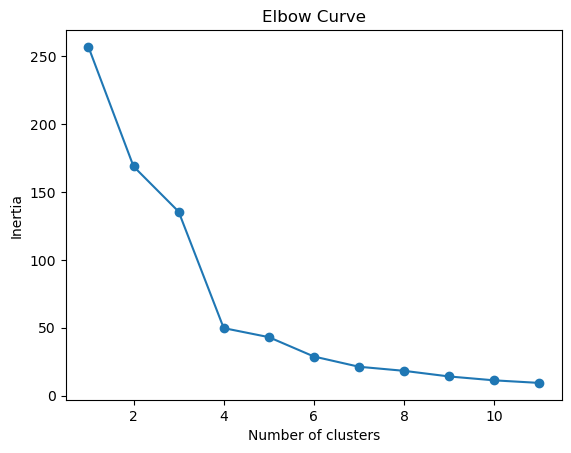

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)


In [ ]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)


In [24]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(pca_df)

# Print the resulting array of cluster values.
print(predictions)


[ 7  7  5  5  8  7  3  3  7  0  4  5  5  8  0  0  4  0  3  5  4  7  4  5
  5  5  0 10  7  6  0  0  2  0  9  5  1 10  0  5  5]


In [25]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df['cluster'] = predictions

# Display sample data
print(clustered_df.head())


                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        7
ethereum     -0.458261  0.458466  0.952877        7
tether       -0.433070 -0.168126 -0.641752        5
ripple       -0.471835 -0.222660 -0.479053        5
bitcoin-cash -1.157800  2.041209  1.859715        8


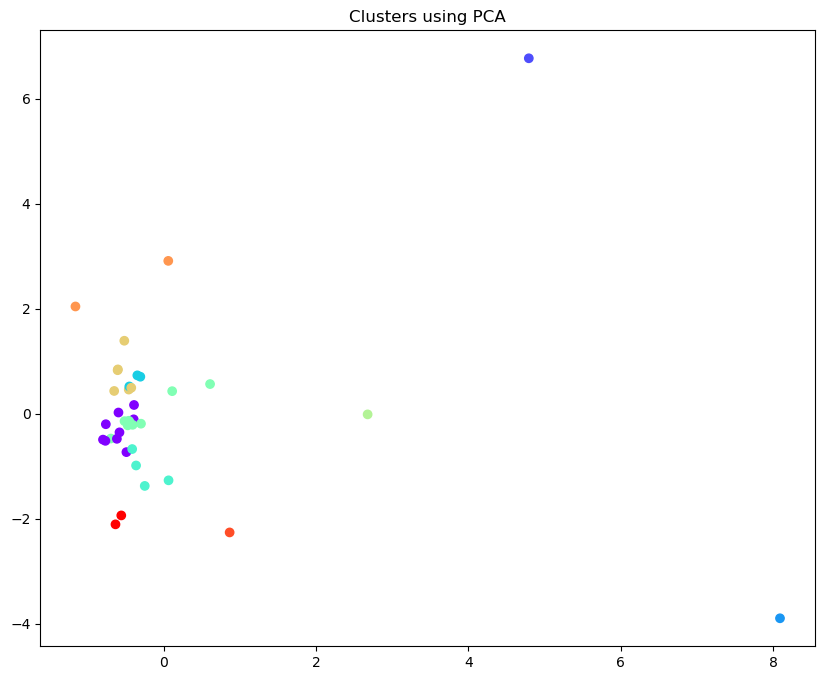

In [26]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
# This will create a scatter plot with the first two principal components on the x and y axes.
plt.figure(figsize=(10,8))
plt.scatter(clustered_df['PC1'], clustered_df['PC2'], c=clustered_df['cluster'], cmap='rainbow')
plt.title('Clusters using PCA')
plt.show()


### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the index from the original market_data_df DataFrame as the index.
scaled_df.index = market_data_df.index



#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
Component 1: `feature_1` (positive), `feature_2` ( negative), `feature_3` (positive) 
    